IMPORTING DATASETS

In [107]:
import os.path
for dirname, _, filenames in os.walk('/Users/pranshmaurya/Desktop/AIML_Project/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/pranshmaurya/Desktop/AIML_Project/archive/.DS_Store
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_10.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_8.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_9.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_2.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_3.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_1.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_4.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_5.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_7.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/apple/Image_6.JPG
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/turnip/Image_10.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/turnip/Image_8.jpg
/Users/pranshmaurya/Desktop/AIML_Project/archive/test/turnip/Image_9.jpg


IMPORTING LIBRARIES

In [108]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

DATA PREPROCESSING

Training image preprocessing

In [109]:
training_set = tf.keras.utils.image_dataset_from_directory(
	'/Users/pranshmaurya/Desktop/AIML_Project/archive/train',
	labels = 'inferred',
	label_mode = 'categorical',
	class_names = None,
	color_mode = 'rgb',
	batch_size = 32,
	image_size = (64, 64),
 	shuffle = True,
  seed = None,
  validation_split = None,
  subset = None,
  interpolation = 'bilinear',
  follow_links = False,
  crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


Validation image preprocessing

In [110]:
validation_set = tf.keras.utils.image_dataset_from_directory(
	'/Users/pranshmaurya/Desktop/AIML_Project/archive/validation',
	labels = 'inferred',
	label_mode = 'categorical',
	class_names = None,
	color_mode = 'rgb',
	batch_size = 32,
	image_size = (64, 64),
 	shuffle = True,
  seed = None,
  validation_split = None,
  subset = None,
  interpolation = 'bilinear',
  follow_links = False,
  crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


BUILDING MODEL

In [111]:
cnn = tf.keras.models.Sequential()

Building convolution layer

In [112]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   # doing max pooling 

In [113]:
cnn.add(tf.keras.layers.Dropout(0.25)) 

In [114]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [115]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [116]:
cnn.add(tf.keras.layers.Flatten())

In [117]:
# neural network
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # here 128 units means we have 128 neutrons

In [118]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [119]:

cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [120]:
# output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# we have taken 36 units because we have 36 classes and we need output only for those 36 classes

COMPILING AND TRAINING PHASE

In [121]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 48s 506ms/step - accuracy: 0.0547 - loss: 108.5124

2024-04-30 13:56:12.205041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:12.256217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 31s 366ms/step - accuracy: 0.0435 - loss: 82.2188

2024-04-30 13:56:15.872267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:15.877764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 30s 358ms/step - accuracy: 0.0428 - loss: 79.2704

2024-04-30 13:56:16.084625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:16.290520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:16.395817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 28s 353ms/step - accuracy: 0.0412 - loss: 74.0329

2024-04-30 13:56:16.951765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.0378 - loss: 62.1944

2024-04-30 13:56:18.537595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:18.635735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - accuracy: 0.0366 - loss: 55.2292

2024-04-30 13:56:19.845828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - accuracy: 0.0362 - loss: 51.8704

2024-04-30 13:56:20.759346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.0358 - loss: 48.9683

2024-04-30 13:56:21.707386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.0357 - loss: 48.0861

2024-04-30 13:56:21.928288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - accuracy: 0.0353 - loss: 46.4329

2024-04-30 13:56:22.529925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:22.593406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step - accuracy: 0.0345 - loss: 42.2076

2024-04-30 13:56:24.126145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 0.0339 - loss: 37.3624

2024-04-30 13:56:26.404884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.0331 - loss: 32.6681

2024-04-30 13:56:29.329241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.0329 - loss: 31.1128

2024-04-30 13:56:30.665067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - accuracy: 0.0327 - loss: 30.2655

2024-04-30 13:56:31.473350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.0323 - loss: 28.2661

2024-04-30 13:56:33.830003: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.0320 - loss: 26.9717

2024-04-30 13:56:35.202540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.0315 - loss: 24.6254

2024-04-30 13:56:38.763091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:39.252350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.0315 - loss: 24.4671 - val_accuracy: 0.0313 - val_loss: 3.5809
Epoch 2/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 49s 506ms/step - accuracy: 0.0312 - loss: 3.5841

2024-04-30 13:56:40.083374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:40.910526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 44s 476ms/step - accuracy: 0.0286 - loss: 3.5828

2024-04-30 13:56:41.752056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.0305 - loss: 3.5814

2024-04-30 13:56:45.012651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - accuracy: 0.0306 - loss: 3.5810

2024-04-30 13:56:46.840613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - accuracy: 0.0306 - loss: 3.5811

2024-04-30 13:56:47.315814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 23s 316ms/step - accuracy: 0.0306 - loss: 3.5813

2024-04-30 13:56:47.762501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:47.913635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - accuracy: 0.0307 - loss: 3.5814

2024-04-30 13:56:48.083852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:48.223336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - accuracy: 0.0309 - loss: 3.5818

2024-04-30 13:56:48.900527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.0306 - loss: 3.5822

2024-04-30 13:56:50.721658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 18s 307ms/step - accuracy: 0.0305 - loss: 3.5823

2024-04-30 13:56:51.143581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:51.326716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:56:51.341208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - accuracy: 0.0307 - loss: 3.5824

2024-04-30 13:56:51.967899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.0308 - loss: 3.5824

2024-04-30 13:56:53.244228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.0310 - loss: 3.5825

2024-04-30 13:56:54.001671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.0320 - loss: 3.5823

2024-04-30 13:56:57.723692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.0324 - loss: 3.5821

2024-04-30 13:56:59.038531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.0333 - loss: 3.5816

2024-04-30 13:57:02.528245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.0336 - loss: 3.5814

2024-04-30 13:57:03.978370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.0337 - loss: 3.5813

2024-04-30 13:57:04.713524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.0342 - loss: 3.5807

2024-04-30 13:57:06.530076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:08.106423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.0342 - loss: 3.5807 - val_accuracy: 0.0399 - val_loss: 3.5739
Epoch 3/32


2024-04-30 13:57:08.986799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 55s 573ms/step - accuracy: 0.0000e+00 - loss: 3.5812

2024-04-30 13:57:09.854189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 54s 569ms/step - accuracy: 0.0260 - loss: 3.5822  

2024-04-30 13:57:10.412960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 31s 352ms/step - accuracy: 0.0284 - loss: 3.5747

2024-04-30 13:57:12.435676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.0281 - loss: 3.5745

2024-04-30 13:57:12.819613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.0278 - loss: 3.5745

2024-04-30 13:57:13.037259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.0273 - loss: 3.5741

2024-04-30 13:57:13.587632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - accuracy: 0.0266 - loss: 3.5741

2024-04-30 13:57:14.498880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 25s 316ms/step - accuracy: 0.0264 - loss: 3.5741

2024-04-30 13:57:14.726646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.0267 - loss: 3.5740

2024-04-30 13:57:15.535974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.0282 - loss: 3.5742

2024-04-30 13:57:17.462424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.0283 - loss: 3.5742

2024-04-30 13:57:17.755076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:17.838548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.0289 - loss: 3.5743

2024-04-30 13:57:18.988818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:19.036505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 280ms/step - accuracy: 0.0294 - loss: 3.5743

2024-04-30 13:57:19.999372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - accuracy: 0.0300 - loss: 3.5743

2024-04-30 13:57:21.240355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - accuracy: 0.0308 - loss: 3.5739

2024-04-30 13:57:24.548693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.0309 - loss: 3.5738

2024-04-30 13:57:24.984268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.0320 - loss: 3.5703

2024-04-30 13:57:28.234800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.0322 - loss: 3.5697

2024-04-30 13:57:29.035302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.0331 - loss: 3.5666

2024-04-30 13:57:32.112297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:32.295586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.0337 - loss: 3.5647

2024-04-30 13:57:34.696967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.0337 - loss: 3.5645 - val_accuracy: 0.0342 - val_loss: 3.5773
Epoch 4/32


2024-04-30 13:57:36.493005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 27s 289ms/step - accuracy: 0.0278 - loss: 3.5869   

2024-04-30 13:57:37.844992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:38.021636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.0421 - loss: 3.5802

2024-04-30 13:57:40.215158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.0416 - loss: 3.5798

2024-04-30 13:57:40.586326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:40.607159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 25s 303ms/step - accuracy: 0.0408 - loss: 3.5799

2024-04-30 13:57:41.201410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.0377 - loss: 3.5811

2024-04-30 13:57:43.321103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.0370 - loss: 3.5811

2024-04-30 13:57:44.405857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.0369 - loss: 3.5806

2024-04-30 13:57:45.745024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:45.911033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:57:45.914974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.0371 - loss: 3.5801

2024-04-30 13:57:46.636132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - accuracy: 0.0372 - loss: 3.5795

2024-04-30 13:57:47.120934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.0373 - loss: 3.5786

2024-04-30 13:57:48.368776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 276ms/step - accuracy: 0.0373 - loss: 3.5780

2024-04-30 13:57:48.683821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - accuracy: 0.0373 - loss: 3.5775

2024-04-30 13:57:49.193788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.0373 - loss: 3.5772

2024-04-30 13:57:49.605525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.0375 - loss: 3.5723

2024-04-30 13:57:52.558754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.0375 - loss: 3.5713

2024-04-30 13:57:53.036383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.0377 - loss: 3.5692

2024-04-30 13:57:54.453356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.0383 - loss: 3.5658

2024-04-30 13:57:56.583896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.0384 - loss: 3.5649

2024-04-30 13:57:57.229431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.0386 - loss: 3.5641

2024-04-30 13:57:57.799438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.0400 - loss: 3.5565

2024-04-30 13:58:03.318754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:03.494989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.0401 - loss: 3.5562 - val_accuracy: 0.0712 - val_loss: 3.5215
Epoch 5/32


2024-04-30 13:58:05.163093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 27s 287ms/step - accuracy: 0.0764 - loss: 3.5184

2024-04-30 13:58:06.383454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 35s 394ms/step - accuracy: 0.0664 - loss: 3.4966

2024-04-30 13:58:07.649220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:07.887217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:08.064307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 32s 366ms/step - accuracy: 0.0631 - loss: 3.4947

2024-04-30 13:58:08.309306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 27s 330ms/step - accuracy: 0.0573 - loss: 3.4979

2024-04-30 13:58:10.420895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 26s 328ms/step - accuracy: 0.0571 - loss: 3.4983

2024-04-30 13:58:10.667984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 25s 320ms/step - accuracy: 0.0566 - loss: 3.4989

2024-04-30 13:58:11.025562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - accuracy: 0.0564 - loss: 3.4991

2024-04-30 13:58:11.443698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:11.580767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - accuracy: 0.0551 - loss: 3.4972

2024-04-30 13:58:13.142848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.0559 - loss: 3.4939

2024-04-30 13:58:14.540855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.0567 - loss: 3.4922

2024-04-30 13:58:15.520369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 0.0579 - loss: 3.4905

2024-04-30 13:58:16.549407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:16.559438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - accuracy: 0.0588 - loss: 3.4890

2024-04-30 13:58:17.281765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.0611 - loss: 3.4844

2024-04-30 13:58:20.460682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.0625 - loss: 3.4807

2024-04-30 13:58:22.694823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.0630 - loss: 3.4793

2024-04-30 13:58:23.475749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.0636 - loss: 3.4776

2024-04-30 13:58:24.935561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:25.067301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.0645 - loss: 3.4745

2024-04-30 13:58:27.011160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.0659 - loss: 3.4683

2024-04-30 13:58:31.327428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:31.494417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.0659 - loss: 3.4680 - val_accuracy: 0.1111 - val_loss: 3.3544
Epoch 6/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.0547 - loss: 3.3302 

2024-04-30 13:58:33.860674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 24s 270ms/step - accuracy: 0.0616 - loss: 3.3572

2024-04-30 13:58:34.868166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.0609 - loss: 3.3659

2024-04-30 13:58:35.764855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 23s 274ms/step - accuracy: 0.0620 - loss: 3.3713

2024-04-30 13:58:36.416112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.0630 - loss: 3.3737

2024-04-30 13:58:36.859079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:37.050818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:37.061343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.0672 - loss: 3.3767

2024-04-30 13:58:39.809089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.0687 - loss: 3.3777

2024-04-30 13:58:40.815609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:40.824720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.0689 - loss: 3.3783

2024-04-30 13:58:41.113977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.0692 - loss: 3.3786

2024-04-30 13:58:41.447577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.0700 - loss: 3.3794

2024-04-30 13:58:42.557040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.0702 - loss: 3.3798

2024-04-30 13:58:42.880640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:58:42.923445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.0722 - loss: 3.3850

2024-04-30 13:58:46.009139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.0728 - loss: 3.3868

2024-04-30 13:58:47.054107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.0745 - loss: 3.3880

2024-04-30 13:58:50.139855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.0748 - loss: 3.3880

2024-04-30 13:58:50.659780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.0754 - loss: 3.3880

2024-04-30 13:58:51.630338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.0755 - loss: 3.3882

2024-04-30 13:58:52.212178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.0761 - loss: 3.3893

2024-04-30 13:58:55.541350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.0761 - loss: 3.3893

2024-04-30 13:58:56.032137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.0768 - loss: 3.3897

2024-04-30 13:58:59.474874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:00.401347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.0769 - loss: 3.3896 - val_accuracy: 0.1425 - val_loss: 3.2315
Epoch 7/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - accuracy: 0.1016 - loss: 3.3468

2024-04-30 13:59:02.380472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 30s 341ms/step - accuracy: 0.1100 - loss: 3.3261

2024-04-30 13:59:04.562164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:04.675554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 28s 331ms/step - accuracy: 0.1084 - loss: 3.3277

2024-04-30 13:59:05.152619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:05.298683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.1077 - loss: 3.3242

2024-04-30 13:59:07.631663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 300ms/step - accuracy: 0.1069 - loss: 3.3236

2024-04-30 13:59:08.549149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.1068 - loss: 3.3232

2024-04-30 13:59:08.769557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - accuracy: 0.1066 - loss: 3.3225

2024-04-30 13:59:09.149258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.1060 - loss: 3.3205

2024-04-30 13:59:10.019750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.1060 - loss: 3.3196

2024-04-30 13:59:10.490941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.1060 - loss: 3.3187

2024-04-30 13:59:10.847752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.1063 - loss: 3.3165

2024-04-30 13:59:11.410364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - accuracy: 0.1065 - loss: 3.3126

2024-04-30 13:59:12.255013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:12.457090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 0.1065 - loss: 3.3109

2024-04-30 13:59:13.044321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.1065 - loss: 3.3091

2024-04-30 13:59:13.507247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.1069 - loss: 3.3020

2024-04-30 13:59:15.288972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.1066 - loss: 3.2898

2024-04-30 13:59:19.692313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.1066 - loss: 3.2875

2024-04-30 13:59:20.738295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.1066 - loss: 3.2857

2024-04-30 13:59:21.787261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.1067 - loss: 3.2845

2024-04-30 13:59:22.626388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.1070 - loss: 3.2805

2024-04-30 13:59:25.221500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.1073 - loss: 3.2768

2024-04-30 13:59:27.074550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:28.024099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 286ms/step - accuracy: 0.1074 - loss: 3.2764 - val_accuracy: 0.2422 - val_loss: 2.8816
Epoch 8/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 35s 368ms/step - accuracy: 0.0703 - loss: 3.2490

2024-04-30 13:59:30.281017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - accuracy: 0.0991 - loss: 3.1796

2024-04-30 13:59:32.674951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:32.681251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:32.882705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:32.910227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.0996 - loss: 3.1871

2024-04-30 13:59:34.616294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.0993 - loss: 3.1913

2024-04-30 13:59:34.960784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.0989 - loss: 3.1965

2024-04-30 13:59:35.816371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - accuracy: 0.0991 - loss: 3.1990

2024-04-30 13:59:36.476784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.0999 - loss: 3.2027

2024-04-30 13:59:37.855857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.1011 - loss: 3.2032

2024-04-30 13:59:38.984750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:38.985631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.1023 - loss: 3.2025

2024-04-30 13:59:39.770155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.1026 - loss: 3.2021

2024-04-30 13:59:40.097542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.1034 - loss: 3.2008

2024-04-30 13:59:40.516253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.1071 - loss: 3.1932

2024-04-30 13:59:43.178498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.1101 - loss: 3.1836

2024-04-30 13:59:47.477468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 280ms/step - accuracy: 0.1104 - loss: 3.1828

2024-04-30 13:59:48.150643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.1108 - loss: 3.1808

2024-04-30 13:59:49.037812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.1112 - loss: 3.1792

2024-04-30 13:59:49.950181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.1116 - loss: 3.1777

2024-04-30 13:59:50.833544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:51.023363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.1125 - loss: 3.1740

2024-04-30 13:59:52.492518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.1146 - loss: 3.1662

2024-04-30 13:59:55.342589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 13:59:55.511560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - accuracy: 0.1147 - loss: 3.1658 - val_accuracy: 0.3134 - val_loss: 2.6059
Epoch 9/32


2024-04-30 13:59:57.952387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.1742 - loss: 3.0067

2024-04-30 14:00:01.638287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:01.653550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - accuracy: 0.1735 - loss: 3.0083

2024-04-30 14:00:02.172842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - accuracy: 0.1735 - loss: 3.0089

2024-04-30 14:00:02.634712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 23s 296ms/step - accuracy: 0.1730 - loss: 3.0120

2024-04-30 14:00:03.263193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.1717 - loss: 3.0155

2024-04-30 14:00:04.099818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.1715 - loss: 3.0185

2024-04-30 14:00:05.066047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.1713 - loss: 3.0187

2024-04-30 14:00:05.387254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.1714 - loss: 3.0158

2024-04-30 14:00:07.221256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.1721 - loss: 3.0129

2024-04-30 14:00:08.126390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.1722 - loss: 3.0124

2024-04-30 14:00:08.373140: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.1724 - loss: 3.0114

2024-04-30 14:00:08.958957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:09.188119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.1725 - loss: 3.0108

2024-04-30 14:00:09.398380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.1725 - loss: 3.0104

2024-04-30 14:00:09.766318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.1731 - loss: 3.0049

2024-04-30 14:00:11.949648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.1728 - loss: 3.0011

2024-04-30 14:00:14.344259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.1731 - loss: 2.9970

2024-04-30 14:00:16.786452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.1732 - loss: 2.9960

2024-04-30 14:00:17.356742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - accuracy: 0.1734 - loss: 2.9942

2024-04-30 14:00:18.021927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.1736 - loss: 2.9925

2024-04-30 14:00:19.152243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.1740 - loss: 2.9861

2024-04-30 14:00:22.451745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.1741 - loss: 2.9818

2024-04-30 14:00:24.721494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:24.893900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.1741 - loss: 2.9815 - val_accuracy: 0.3419 - val_loss: 2.5505
Epoch 10/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 25s 268ms/step - accuracy: 0.1059 - loss: 3.0935

2024-04-30 14:00:27.678004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 324ms/step - accuracy: 0.1327 - loss: 3.0733

2024-04-30 14:00:30.490087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.1330 - loss: 3.0717

2024-04-30 14:00:30.824611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 26s 317ms/step - accuracy: 0.1331 - loss: 3.0700

2024-04-30 14:00:31.103415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 26s 316ms/step - accuracy: 0.1335 - loss: 3.0674

2024-04-30 14:00:31.398492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:31.488024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:31.540625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:31.581287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.1379 - loss: 3.0462

2024-04-30 14:00:33.125319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - accuracy: 0.1422 - loss: 3.0288

2024-04-30 14:00:34.097712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - accuracy: 0.1440 - loss: 3.0210

2024-04-30 14:00:34.689905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.1522 - loss: 2.9936

2024-04-30 14:00:36.599435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.1531 - loss: 2.9904

2024-04-30 14:00:36.887795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.1549 - loss: 2.9842

2024-04-30 14:00:37.401554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:37.639279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 284ms/step - accuracy: 0.1573 - loss: 2.9748

2024-04-30 14:00:38.426518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.1627 - loss: 2.9521

2024-04-30 14:00:40.517351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.1690 - loss: 2.9270 

2024-04-30 14:00:43.697149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.1707 - loss: 2.9217

2024-04-30 14:00:44.809961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.1727 - loss: 2.9159

2024-04-30 14:00:46.338354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.1749 - loss: 2.9092

2024-04-30 14:00:47.889862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.1756 - loss: 2.9069

2024-04-30 14:00:48.642710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.1769 - loss: 2.9027

2024-04-30 14:00:49.576810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.1818 - loss: 2.8877

2024-04-30 14:00:53.339231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:53.996923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.1821 - loss: 2.8868 - val_accuracy: 0.4672 - val_loss: 2.0309
Epoch 11/32
 5/98 ━━━━━━━━━━━━━━━━━━━━ 26s 288ms/step - accuracy: 0.2551 - loss: 2.6653

2024-04-30 14:00:56.865512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.2633 - loss: 2.6306

2024-04-30 14:00:57.450655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - accuracy: 0.2643 - loss: 2.6104

2024-04-30 14:00:58.567799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.2637 - loss: 2.6067

2024-04-30 14:00:58.975672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.2614 - loss: 2.6056

2024-04-30 14:00:59.675898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:00:59.833249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 25s 309ms/step - accuracy: 0.2608 - loss: 2.6066

2024-04-30 14:00:59.942010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.2581 - loss: 2.6115

2024-04-30 14:01:01.142982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.2565 - loss: 2.6135

2024-04-30 14:01:02.439060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.2562 - loss: 2.6140

2024-04-30 14:01:02.977401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.2566 - loss: 2.6115

2024-04-30 14:01:04.204485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.2568 - loss: 2.6112

2024-04-30 14:01:04.938247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:04.956924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.2567 - loss: 2.6118

2024-04-30 14:01:05.699901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.2566 - loss: 2.6116

2024-04-30 14:01:06.801637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.2564 - loss: 2.6119

2024-04-30 14:01:07.608916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 288ms/step - accuracy: 0.2562 - loss: 2.6124

2024-04-30 14:01:07.987014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.2542 - loss: 2.6184 

2024-04-30 14:01:13.194527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.2543 - loss: 2.6187

2024-04-30 14:01:15.304714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:15.321228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.2545 - loss: 2.6186

2024-04-30 14:01:16.015018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - accuracy: 0.2546 - loss: 2.6186

2024-04-30 14:01:16.300433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.2548 - loss: 2.6185

2024-04-30 14:01:17.120820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.2577 - loss: 2.6141

2024-04-30 14:01:21.422211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:23.232185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.2578 - loss: 2.6139 - val_accuracy: 0.5698 - val_loss: 1.8806
Epoch 12/32
 6/98 ━━━━━━━━━━━━━━━━━━━━ 25s 273ms/step - accuracy: 0.2248 - loss: 2.7316

2024-04-30 14:01:25.880770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:26.036088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - accuracy: 0.2353 - loss: 2.6980

2024-04-30 14:01:26.923151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - accuracy: 0.2402 - loss: 2.6780

2024-04-30 14:01:27.567440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:27.673986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 319ms/step - accuracy: 0.2469 - loss: 2.6572

2024-04-30 14:01:28.306883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.2494 - loss: 2.6494

2024-04-30 14:01:29.045256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - accuracy: 0.2512 - loss: 2.6400

2024-04-30 14:01:30.087651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - accuracy: 0.2532 - loss: 2.6311

2024-04-30 14:01:31.305917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - accuracy: 0.2545 - loss: 2.6265

2024-04-30 14:01:31.801759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.2558 - loss: 2.6224

2024-04-30 14:01:32.386070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.2609 - loss: 2.6045

2024-04-30 14:01:34.202141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:34.224345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.2630 - loss: 2.5978

2024-04-30 14:01:35.050699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.2651 - loss: 2.5919

2024-04-30 14:01:36.064015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.2656 - loss: 2.5908

2024-04-30 14:01:36.599652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.2665 - loss: 2.5889

2024-04-30 14:01:36.926787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.2688 - loss: 2.5844

2024-04-30 14:01:38.290864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.2770 - loss: 2.5618

2024-04-30 14:01:43.736955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.2779 - loss: 2.5592

2024-04-30 14:01:44.221995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - accuracy: 0.2796 - loss: 2.5539

2024-04-30 14:01:45.330170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.2800 - loss: 2.5526

2024-04-30 14:01:45.782483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.2823 - loss: 2.5445

2024-04-30 14:01:47.465857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.2862 - loss: 2.5315

2024-04-30 14:01:49.947664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:01:50.763299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.2864 - loss: 2.5306 - val_accuracy: 0.5926 - val_loss: 1.6560
Epoch 13/32


2024-04-30 14:01:52.607676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.3359 - loss: 2.2380

2024-04-30 14:01:54.037641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.3240 - loss: 2.2897

2024-04-30 14:01:56.440415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - accuracy: 0.3239 - loss: 2.2950

2024-04-30 14:01:56.969917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - accuracy: 0.3248 - loss: 2.3054

2024-04-30 14:01:57.642849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.3275 - loss: 2.3077

2024-04-30 14:01:58.231145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 23s 307ms/step - accuracy: 0.3306 - loss: 2.3065

2024-04-30 14:01:58.848372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.3318 - loss: 2.3050

2024-04-30 14:01:59.256334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.3337 - loss: 2.3028

2024-04-30 14:01:59.765913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.3351 - loss: 2.3014

2024-04-30 14:02:00.282637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:00.396167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.3392 - loss: 2.2938

2024-04-30 14:02:01.439768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.3411 - loss: 2.2901

2024-04-30 14:02:02.631640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - accuracy: 0.3424 - loss: 2.2864

2024-04-30 14:02:03.826721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 281ms/step - accuracy: 0.3431 - loss: 2.2845

2024-04-30 14:02:04.325888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:04.357777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:04.458873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.3455 - loss: 2.2797

2024-04-30 14:02:06.056837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.3486 - loss: 2.2745

2024-04-30 14:02:08.349468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.3519 - loss: 2.2676

2024-04-30 14:02:10.693086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.3523 - loss: 2.2666

2024-04-30 14:02:10.912197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.3572 - loss: 2.2517

2024-04-30 14:02:14.484193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.3583 - loss: 2.2482

2024-04-30 14:02:15.368599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.3635 - loss: 2.2306

2024-04-30 14:02:18.196749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:18.699385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.3638 - loss: 2.2295 - val_accuracy: 0.7066 - val_loss: 1.2254
Epoch 14/32


2024-04-30 14:02:20.916423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.4375 - loss: 1.6033

2024-04-30 14:02:21.564413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.3322 - loss: 2.3111

2024-04-30 14:02:24.275056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.3363 - loss: 2.3170

2024-04-30 14:02:24.991509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.3368 - loss: 2.3183

2024-04-30 14:02:25.298349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.3386 - loss: 2.3165

2024-04-30 14:02:25.770529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.3406 - loss: 2.3130

2024-04-30 14:02:26.535075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.3417 - loss: 2.3106

2024-04-30 14:02:26.965873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.3430 - loss: 2.3076

2024-04-30 14:02:27.235551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:27.336482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:27.346969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.3498 - loss: 2.2849

2024-04-30 14:02:28.733792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - accuracy: 0.3516 - loss: 2.2781

2024-04-30 14:02:29.271125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - accuracy: 0.3535 - loss: 2.2719

2024-04-30 14:02:29.572326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 267ms/step - accuracy: 0.3575 - loss: 2.2588

2024-04-30 14:02:31.059130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.3623 - loss: 2.2422

2024-04-30 14:02:33.095849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.3655 - loss: 2.2317

2024-04-30 14:02:34.478198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:34.570898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.3782 - loss: 2.1929

2024-04-30 14:02:39.240984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:39.270617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.3834 - loss: 2.1766

2024-04-30 14:02:41.430607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:41.448712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.3853 - loss: 2.1708

2024-04-30 14:02:42.144047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.3960 - loss: 2.1361

2024-04-30 14:02:47.411902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:47.466092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.3965 - loss: 2.1345 - val_accuracy: 0.7464 - val_loss: 1.0793
Epoch 15/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 30s 320ms/step - accuracy: 0.4740 - loss: 1.8034

2024-04-30 14:02:50.347989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:50.377618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 32s 361ms/step - accuracy: 0.4664 - loss: 1.8932

2024-04-30 14:02:52.348098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 324ms/step - accuracy: 0.4620 - loss: 1.9061

2024-04-30 14:02:53.647505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:53.661699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.4621 - loss: 1.8942

2024-04-30 14:02:54.958700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.4616 - loss: 1.8933

2024-04-30 14:02:55.324385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.4616 - loss: 1.8916

2024-04-30 14:02:55.553992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.4613 - loss: 1.8900

2024-04-30 14:02:56.203162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.4615 - loss: 1.8847

2024-04-30 14:02:56.795180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.4626 - loss: 1.8793

2024-04-30 14:02:57.515488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:02:57.554131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - accuracy: 0.4652 - loss: 1.8689

2024-04-30 14:02:58.471200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.4666 - loss: 1.8645

2024-04-30 14:02:59.047251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - accuracy: 0.4683 - loss: 1.8587

2024-04-30 14:02:59.787419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - accuracy: 0.4696 - loss: 1.8547

2024-04-30 14:03:00.301186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 283ms/step - accuracy: 0.4703 - loss: 1.8522

2024-04-30 14:03:01.109362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.4730 - loss: 1.8403

2024-04-30 14:03:05.119246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.4754 - loss: 1.8290

2024-04-30 14:03:08.198242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.4759 - loss: 1.8267

2024-04-30 14:03:08.718406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.4764 - loss: 1.8242

2024-04-30 14:03:09.321920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.4770 - loss: 1.8217

2024-04-30 14:03:09.709267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.4810 - loss: 1.8061

2024-04-30 14:03:12.776194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4856 - loss: 1.7902

2024-04-30 14:03:16.072758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:16.243302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.4859 - loss: 1.7891 - val_accuracy: 0.7436 - val_loss: 1.0388
Epoch 16/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 32s 339ms/step - accuracy: 0.5833 - loss: 1.5866

2024-04-30 14:03:18.786820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:18.919113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 32s 366ms/step - accuracy: 0.5500 - loss: 1.6501

2024-04-30 14:03:20.879242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.5340 - loss: 1.6757

2024-04-30 14:03:21.985645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - accuracy: 0.5256 - loss: 1.6881

2024-04-30 14:03:23.631553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - accuracy: 0.5230 - loss: 1.6913

2024-04-30 14:03:24.073732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.5199 - loss: 1.6953

2024-04-30 14:03:24.854583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.5189 - loss: 1.6963

2024-04-30 14:03:25.241741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 22s 307ms/step - accuracy: 0.5180 - loss: 1.6976

2024-04-30 14:03:25.620928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.5173 - loss: 1.6989

2024-04-30 14:03:25.840830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:25.863605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.5139 - loss: 1.7023

2024-04-30 14:03:27.367268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - accuracy: 0.5132 - loss: 1.7018

2024-04-30 14:03:27.905447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 292ms/step - accuracy: 0.5125 - loss: 1.7019

2024-04-30 14:03:28.285066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - accuracy: 0.5118 - loss: 1.7014

2024-04-30 14:03:29.031637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.5111 - loss: 1.7006

2024-04-30 14:03:31.126807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 14s 287ms/step - accuracy: 0.5111 - loss: 1.7000

2024-04-30 14:03:31.486920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - accuracy: 0.5111 - loss: 1.6997

2024-04-30 14:03:31.759973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.5120 - loss: 1.6956

2024-04-30 14:03:34.191218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.5140 - loss: 1.6884

2024-04-30 14:03:36.706496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.5145 - loss: 1.6865

2024-04-30 14:03:37.092924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.5176 - loss: 1.6732

2024-04-30 14:03:40.993199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:41.145164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5207 - loss: 1.6599

2024-04-30 14:03:43.154686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:44.611993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.5209 - loss: 1.6589 - val_accuracy: 0.8063 - val_loss: 0.8171
Epoch 17/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.5501 - loss: 1.5273

2024-04-30 14:03:46.775765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 27s 314ms/step - accuracy: 0.5811 - loss: 1.4901

2024-04-30 14:03:49.325967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 26s 309ms/step - accuracy: 0.5846 - loss: 1.4872

2024-04-30 14:03:49.741590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:49.892344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 25s 308ms/step - accuracy: 0.5877 - loss: 1.4821

2024-04-30 14:03:50.374319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - accuracy: 0.5897 - loss: 1.4785

2024-04-30 14:03:51.005097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 297ms/step - accuracy: 0.5924 - loss: 1.4704

2024-04-30 14:03:51.952375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.5925 - loss: 1.4679

2024-04-30 14:03:52.523401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - accuracy: 0.5928 - loss: 1.4647

2024-04-30 14:03:53.175334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 285ms/step - accuracy: 0.5935 - loss: 1.4556

2024-04-30 14:03:54.576488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:54.735630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.5939 - loss: 1.4518

2024-04-30 14:03:55.334222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.5943 - loss: 1.4502

2024-04-30 14:03:55.537601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.5952 - loss: 1.4460

2024-04-30 14:03:56.225768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 276ms/step - accuracy: 0.5969 - loss: 1.4372

2024-04-30 14:03:57.040710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:03:57.221241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.5997 - loss: 1.4182

2024-04-30 14:03:59.524570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.6023 - loss: 1.3963

2024-04-30 14:04:03.317694: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.6026 - loss: 1.3927

2024-04-30 14:04:04.128245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.6033 - loss: 1.3871

2024-04-30 14:04:05.312530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.6039 - loss: 1.3825

2024-04-30 14:04:06.237155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.6055 - loss: 1.3737

2024-04-30 14:04:09.051722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.6058 - loss: 1.3723

2024-04-30 14:04:09.567554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6072 - loss: 1.3657

2024-04-30 14:04:12.675598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:12.800542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.6073 - loss: 1.3650 - val_accuracy: 0.8148 - val_loss: 0.8418
Epoch 18/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 53s 556ms/step - accuracy: 0.5625 - loss: 1.6705

2024-04-30 14:04:14.132036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:14.670173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:14.778919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 28s 328ms/step - accuracy: 0.6068 - loss: 1.4130

2024-04-30 14:04:17.775097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:17.836765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:17.964184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 26s 316ms/step - accuracy: 0.6053 - loss: 1.4062

2024-04-30 14:04:18.660208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.6052 - loss: 1.3915

2024-04-30 14:04:19.962196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:19.990767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.6074 - loss: 1.3689

2024-04-30 14:04:21.801226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 20s 287ms/step - accuracy: 0.6079 - loss: 1.3653

2024-04-30 14:04:22.031548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.6085 - loss: 1.3596

2024-04-30 14:04:22.335663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:22.496535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.6091 - loss: 1.3545

2024-04-30 14:04:23.022320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.6106 - loss: 1.3429

2024-04-30 14:04:24.105867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - accuracy: 0.6116 - loss: 1.3377

2024-04-30 14:04:25.074320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.6125 - loss: 1.3335

2024-04-30 14:04:25.785931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.6153 - loss: 1.3225

2024-04-30 14:04:28.064235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.6201 - loss: 1.3039

2024-04-30 14:04:33.185667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.6205 - loss: 1.3022

2024-04-30 14:04:33.749593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.6217 - loss: 1.2980

2024-04-30 14:04:34.962519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.6236 - loss: 1.2913

2024-04-30 14:04:37.191265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.6238 - loss: 1.2904

2024-04-30 14:04:37.471954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.6262 - loss: 1.2817

2024-04-30 14:04:39.167597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:40.001152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.6265 - loss: 1.2809 - val_accuracy: 0.8462 - val_loss: 0.7307
Epoch 19/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 38s 401ms/step - accuracy: 0.5781 - loss: 1.2240

2024-04-30 14:04:42.465504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 45s 483ms/step - accuracy: 0.5590 - loss: 1.2930

2024-04-30 14:04:42.940670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 324ms/step - accuracy: 0.5774 - loss: 1.3537

2024-04-30 14:04:45.473184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 26s 315ms/step - accuracy: 0.5838 - loss: 1.3433

2024-04-30 14:04:46.027562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:46.184659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 26s 313ms/step - accuracy: 0.5870 - loss: 1.3379

2024-04-30 14:04:46.366717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.5897 - loss: 1.3334

2024-04-30 14:04:46.676537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.6094 - loss: 1.2948

2024-04-30 14:04:49.181878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.6129 - loss: 1.2858

2024-04-30 14:04:49.924142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 0.6163 - loss: 1.2768

2024-04-30 14:04:50.333183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.6192 - loss: 1.2692

2024-04-30 14:04:50.779205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:50.790362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.6243 - loss: 1.2545

2024-04-30 14:04:52.086141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.6251 - loss: 1.2519

2024-04-30 14:04:52.325396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:52.512963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:52.559595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:04:52.562359: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 16s 286ms/step - accuracy: 0.6266 - loss: 1.2471

2024-04-30 14:04:53.178092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.6381 - loss: 1.2149

2024-04-30 14:04:58.148016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.6425 - loss: 1.2024

2024-04-30 14:05:00.145646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.6451 - loss: 1.1947

2024-04-30 14:05:02.213691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.6461 - loss: 1.1918

2024-04-30 14:05:03.083075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.6480 - loss: 1.1864

2024-04-30 14:05:04.494584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.6533 - loss: 1.1709

2024-04-30 14:05:08.621193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:09.230880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.6536 - loss: 1.1699 - val_accuracy: 0.8547 - val_loss: 0.6699
Epoch 20/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 693ms/step - accuracy: 0.5625 - loss: 1.2876

2024-04-30 14:05:10.509055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.6076 - loss: 1.1906

2024-04-30 14:05:11.086479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.6365 - loss: 1.1035

2024-04-30 14:05:11.912551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.6519 - loss: 1.0695

2024-04-30 14:05:12.487525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - accuracy: 0.6555 - loss: 1.0895

2024-04-30 14:05:14.135969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.6557 - loss: 1.0996

2024-04-30 14:05:14.943766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - accuracy: 0.6530 - loss: 1.1171

2024-04-30 14:05:16.367775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:16.529579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - accuracy: 0.6527 - loss: 1.1193

2024-04-30 14:05:17.478338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.6523 - loss: 1.1211

2024-04-30 14:05:18.067823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.6525 - loss: 1.1215

2024-04-30 14:05:19.009443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - accuracy: 0.6529 - loss: 1.1218

2024-04-30 14:05:19.750179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - accuracy: 0.6541 - loss: 1.1208

2024-04-30 14:05:21.061393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:21.065253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:21.098336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.6548 - loss: 1.1196

2024-04-30 14:05:21.523245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - accuracy: 0.6557 - loss: 1.1184

2024-04-30 14:05:22.176788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.6583 - loss: 1.1141

2024-04-30 14:05:23.974897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.6607 - loss: 1.1101

2024-04-30 14:05:25.658464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.6639 - loss: 1.1041

2024-04-30 14:05:28.003952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:28.032183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.6648 - loss: 1.1026

2024-04-30 14:05:28.795061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.6657 - loss: 1.1011

2024-04-30 14:05:29.527791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.6728 - loss: 1.0866

2024-04-30 14:05:36.274428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:37.337612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.6731 - loss: 1.0860 - val_accuracy: 0.8547 - val_loss: 0.7064
Epoch 21/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 29s 314ms/step - accuracy: 0.7676 - loss: 0.8837

2024-04-30 14:05:39.270803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 28s 302ms/step - accuracy: 0.7603 - loss: 0.9113

2024-04-30 14:05:39.605151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 28s 328ms/step - accuracy: 0.7362 - loss: 0.9603

2024-04-30 14:05:41.643649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 324ms/step - accuracy: 0.7330 - loss: 0.9698

2024-04-30 14:05:41.964426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:42.043950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.7308 - loss: 0.9758

2024-04-30 14:05:42.226774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 25s 310ms/step - accuracy: 0.7239 - loss: 0.9907

2024-04-30 14:05:43.272708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.7230 - loss: 0.9920

2024-04-30 14:05:43.605319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - accuracy: 0.7222 - loss: 0.9939

2024-04-30 14:05:43.837047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.7216 - loss: 0.9948

2024-04-30 14:05:44.048131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.7208 - loss: 0.9938

2024-04-30 14:05:45.179008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - accuracy: 0.7209 - loss: 0.9927

2024-04-30 14:05:45.984093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.7211 - loss: 0.9910

2024-04-30 14:05:47.778937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:47.786904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - accuracy: 0.7210 - loss: 0.9908

2024-04-30 14:05:48.526892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.7209 - loss: 0.9901

2024-04-30 14:05:49.099967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.7214 - loss: 0.9868

2024-04-30 14:05:50.609314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.7215 - loss: 0.9856

2024-04-30 14:05:51.008953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - accuracy: 0.7228 - loss: 0.9775

2024-04-30 14:05:53.908449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.7236 - loss: 0.9718

2024-04-30 14:05:55.826674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.7239 - loss: 0.9697

2024-04-30 14:05:56.592594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:05:56.610417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.7245 - loss: 0.9655

2024-04-30 14:05:58.169105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.7265 - loss: 0.9525

2024-04-30 14:06:03.695313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:05.519667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.7265 - loss: 0.9521 - val_accuracy: 0.8718 - val_loss: 0.5576
Epoch 22/32
 7/98 ━━━━━━━━━━━━━━━━━━━━ 32s 358ms/step - accuracy: 0.6401 - loss: 1.1230

2024-04-30 14:06:08.559772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.6587 - loss: 1.0766

2024-04-30 14:06:09.150932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.6788 - loss: 1.0285

2024-04-30 14:06:10.078726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:10.258244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 26s 310ms/step - accuracy: 0.6881 - loss: 1.0041

2024-04-30 14:06:10.422699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.7064 - loss: 0.9617

2024-04-30 14:06:12.420394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:12.466967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:12.563807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 298ms/step - accuracy: 0.7114 - loss: 0.9495

2024-04-30 14:06:13.461689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - accuracy: 0.7151 - loss: 0.9418

2024-04-30 14:06:14.135620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - accuracy: 0.7172 - loss: 0.9385

2024-04-30 14:06:14.630158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.7180 - loss: 0.9372

2024-04-30 14:06:15.070544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.7229 - loss: 0.9288

2024-04-30 14:06:16.601436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:16.785658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - accuracy: 0.7242 - loss: 0.9263

2024-04-30 14:06:17.291991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:17.295054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - accuracy: 0.7254 - loss: 0.9238

2024-04-30 14:06:17.585155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.7266 - loss: 0.9212

2024-04-30 14:06:18.420671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 0.7340 - loss: 0.9043

2024-04-30 14:06:22.533822: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.7362 - loss: 0.8987

2024-04-30 14:06:24.392963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.7386 - loss: 0.8929

2024-04-30 14:06:26.681220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.7388 - loss: 0.8924

2024-04-30 14:06:26.967416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.7405 - loss: 0.8882

2024-04-30 14:06:28.696165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7437 - loss: 0.8792

2024-04-30 14:06:31.866605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:32.721196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.7439 - loss: 0.8787 - val_accuracy: 0.8661 - val_loss: 0.5672
Epoch 23/32


2024-04-30 14:06:34.373010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.6328 - loss: 1.3071 

2024-04-30 14:06:35.186839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 32s 361ms/step - accuracy: 0.6890 - loss: 1.1130

2024-04-30 14:06:37.283988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 28s 330ms/step - accuracy: 0.7075 - loss: 1.0521

2024-04-30 14:06:38.312893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step - accuracy: 0.7113 - loss: 1.0377

2024-04-30 14:06:38.638865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 26s 321ms/step - accuracy: 0.7147 - loss: 1.0240

2024-04-30 14:06:38.963684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:39.031479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 24s 315ms/step - accuracy: 0.7298 - loss: 0.9578

2024-04-30 14:06:40.752845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 23s 309ms/step - accuracy: 0.7348 - loss: 0.9346

2024-04-30 14:06:41.414546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - accuracy: 0.7362 - loss: 0.9281

2024-04-30 14:06:41.697629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 22s 307ms/step - accuracy: 0.7376 - loss: 0.9217

2024-04-30 14:06:42.127311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.7465 - loss: 0.8781

2024-04-30 14:06:43.893862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.7490 - loss: 0.8660

2024-04-30 14:06:44.926918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:06:44.935617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.7527 - loss: 0.8493

2024-04-30 14:06:46.248178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.7534 - loss: 0.8463

2024-04-30 14:06:46.552798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.7556 - loss: 0.8373

2024-04-30 14:06:47.071572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.7601 - loss: 0.8188

2024-04-30 14:06:49.090955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.7631 - loss: 0.8064

2024-04-30 14:06:51.240336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.7651 - loss: 0.7983

2024-04-30 14:06:52.806326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.7654 - loss: 0.7969

2024-04-30 14:06:53.243598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.7663 - loss: 0.7932

2024-04-30 14:06:53.945863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.7671 - loss: 0.7895

2024-04-30 14:06:54.498961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.7724 - loss: 0.7663

2024-04-30 14:07:01.373768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:07:01.751025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.7726 - loss: 0.7656 - val_accuracy: 0.8746 - val_loss: 0.6632
Epoch 24/32


2024-04-30 14:07:03.650891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.7285 - loss: 0.7034

2024-04-30 14:07:04.771587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.7125 - loss: 0.8303

2024-04-30 14:07:06.434916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 23s 276ms/step - accuracy: 0.7136 - loss: 0.8300

2024-04-30 14:07:06.677245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - accuracy: 0.7133 - loss: 0.8372

2024-04-30 14:07:07.032819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:07:07.044846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.7146 - loss: 0.8532

2024-04-30 14:07:08.313080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:07:08.322304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - accuracy: 0.7151 - loss: 0.8548

2024-04-30 14:07:08.693491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.7170 - loss: 0.8550

2024-04-30 14:07:09.156573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.7190 - loss: 0.8546

2024-04-30 14:07:09.768103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - accuracy: 0.7245 - loss: 0.8508

2024-04-30 14:07:11.136346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.7283 - loss: 0.8481

2024-04-30 14:07:12.714166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 282ms/step - accuracy: 0.7340 - loss: 0.8421

2024-04-30 14:07:14.431633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:07:14.494538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.7385 - loss: 0.8364

2024-04-30 14:07:15.766853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.7400 - loss: 0.8342

2024-04-30 14:07:16.300296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:07:16.367831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7486 - loss: 0.8242

2024-04-30 14:08:23.631943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7522 - loss: 0.8205

2024-04-30 14:08:26.421039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7535 - loss: 0.8195

2024-04-30 14:08:27.733524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7552 - loss: 0.8173

2024-04-30 14:08:29.678192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:29.718339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.7571 - loss: 0.8152

2024-04-30 14:08:33.695125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:34.804323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 942ms/step - accuracy: 0.7572 - loss: 0.8150 - val_accuracy: 0.8832 - val_loss: 0.5340
Epoch 25/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:30 937ms/step - accuracy: 0.7500 - loss: 0.6047

2024-04-30 14:08:36.308600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.7255 - loss: 0.7656

2024-04-30 14:08:37.435917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.7301 - loss: 0.7704

2024-04-30 14:08:37.752418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 19s 227ms/step - accuracy: 0.7374 - loss: 0.7760

2024-04-30 14:08:38.395849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.7400 - loss: 0.7758

2024-04-30 14:08:38.659301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:38.824503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 16s 215ms/step - accuracy: 0.7514 - loss: 0.7729

2024-04-30 14:08:40.190873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.7561 - loss: 0.7674

2024-04-30 14:08:41.239476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.7569 - loss: 0.7658

2024-04-30 14:08:41.476129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.7600 - loss: 0.7602

2024-04-30 14:08:42.529824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:42.580803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.7605 - loss: 0.7594

2024-04-30 14:08:42.742061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.7616 - loss: 0.7578

2024-04-30 14:08:43.178746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.7644 - loss: 0.7524

2024-04-30 14:08:44.275682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.7657 - loss: 0.7497

2024-04-30 14:08:44.881011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.7670 - loss: 0.7473

2024-04-30 14:08:45.659121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.7686 - loss: 0.7442

2024-04-30 14:08:46.582133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.7697 - loss: 0.7417 

2024-04-30 14:08:47.023704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.7722 - loss: 0.7369

2024-04-30 14:08:49.072634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.7762 - loss: 0.7291

2024-04-30 14:08:51.582587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.7792 - loss: 0.7242

2024-04-30 14:08:54.358749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.7797 - loss: 0.7232

2024-04-30 14:08:55.041845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:55.053477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7819 - loss: 0.7187

2024-04-30 14:08:56.899620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:57.528316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.7821 - loss: 0.7182 - val_accuracy: 0.8974 - val_loss: 0.5811
Epoch 26/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 46s 475ms/step - accuracy: 0.8438 - loss: 0.4741

2024-04-30 14:08:58.876520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 267ms/step - accuracy: 0.8229 - loss: 0.6036

2024-04-30 14:08:59.600736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:08:59.661663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.8026 - loss: 0.6710

2024-04-30 14:09:01.605614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.8044 - loss: 0.6724

2024-04-30 14:09:02.413620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - accuracy: 0.8070 - loss: 0.6653

2024-04-30 14:09:03.191953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:03.245702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.8093 - loss: 0.6570

2024-04-30 14:09:04.329053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.8108 - loss: 0.6509

2024-04-30 14:09:04.937115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - accuracy: 0.8115 - loss: 0.6482

2024-04-30 14:09:05.266639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - accuracy: 0.8127 - loss: 0.6404

2024-04-30 14:09:06.401177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 16s 262ms/step - accuracy: 0.8131 - loss: 0.6358

2024-04-30 14:09:07.700766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:07.890311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.8132 - loss: 0.6357

2024-04-30 14:09:08.178649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step - accuracy: 0.8133 - loss: 0.6353

2024-04-30 14:09:08.511806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 260ms/step - accuracy: 0.8131 - loss: 0.6358

2024-04-30 14:09:10.129431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.8132 - loss: 0.6357

2024-04-30 14:09:12.765264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - accuracy: 0.8133 - loss: 0.6360

2024-04-30 14:09:14.178923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:14.230894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.8133 - loss: 0.6359

2024-04-30 14:09:14.647729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.8133 - loss: 0.6358

2024-04-30 14:09:15.813237: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:15.819834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8132 - loss: 0.6348

2024-04-30 14:09:20.459857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8136 - loss: 0.6333

2024-04-30 14:09:22.734666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:23.476030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.8136 - loss: 0.6332 - val_accuracy: 0.9060 - val_loss: 0.5362
Epoch 27/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 35s 378ms/step - accuracy: 0.8086 - loss: 0.6542

2024-04-30 14:09:25.836249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.8193 - loss: 0.6253

2024-04-30 14:09:27.642975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - accuracy: 0.8212 - loss: 0.6203

2024-04-30 14:09:27.988853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:28.067197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 294ms/step - accuracy: 0.8234 - loss: 0.6156

2024-04-30 14:09:28.375200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - accuracy: 0.8252 - loss: 0.6128

2024-04-30 14:09:28.880040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.8261 - loss: 0.6110

2024-04-30 14:09:29.181394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - accuracy: 0.8289 - loss: 0.6051

2024-04-30 14:09:30.277909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - accuracy: 0.8301 - loss: 0.6029

2024-04-30 14:09:30.865368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.8317 - loss: 0.6003

2024-04-30 14:09:31.427357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - accuracy: 0.8328 - loss: 0.5983

2024-04-30 14:09:32.800326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.8331 - loss: 0.5983

2024-04-30 14:09:33.040004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.8340 - loss: 0.5978

2024-04-30 14:09:34.242996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.8344 - loss: 0.5968

2024-04-30 14:09:34.732669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 0.8345 - loss: 0.5959

2024-04-30 14:09:35.964377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.8344 - loss: 0.5962

2024-04-30 14:09:36.631942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.8342 - loss: 0.5973

2024-04-30 14:09:38.440831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.8341 - loss: 0.5973

2024-04-30 14:09:39.032014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.8340 - loss: 0.5967

2024-04-30 14:09:40.151549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.8338 - loss: 0.5952

2024-04-30 14:09:42.118751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.8338 - loss: 0.5944

2024-04-30 14:09:43.366698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.8338 - loss: 0.5943

2024-04-30 14:09:43.909026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.8338 - loss: 0.5935

2024-04-30 14:09:44.839095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8350 - loss: 0.5878

2024-04-30 14:09:49.029331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:49.098394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.8351 - loss: 0.5874 - val_accuracy: 0.9174 - val_loss: 0.4644
Epoch 28/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - accuracy: 0.9028 - loss: 0.4145

2024-04-30 14:09:52.322130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.8660 - loss: 0.5525

2024-04-30 14:09:54.743743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.8655 - loss: 0.5535

2024-04-30 14:09:55.076555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.8651 - loss: 0.5537

2024-04-30 14:09:55.465291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.8646 - loss: 0.5503

2024-04-30 14:09:56.604967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:56.605915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:56.798988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - accuracy: 0.8643 - loss: 0.5477

2024-04-30 14:09:57.093677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:09:57.269946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.8638 - loss: 0.5426

2024-04-30 14:09:57.989501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.8633 - loss: 0.5376

2024-04-30 14:09:58.730799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.8626 - loss: 0.5321

2024-04-30 14:09:59.444836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - accuracy: 0.8619 - loss: 0.5259

2024-04-30 14:10:00.832814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:00.852095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:01.056146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:01.057347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.8581 - loss: 0.5265

2024-04-30 14:10:05.380946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:05.481708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.8567 - loss: 0.5299

2024-04-30 14:10:06.934879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.8557 - loss: 0.5329

2024-04-30 14:10:08.175223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:08.219672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.8533 - loss: 0.5395

2024-04-30 14:10:11.504010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.8520 - loss: 0.5429

2024-04-30 14:10:13.540066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8503 - loss: 0.5471

2024-04-30 14:10:15.969778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:16.349399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.8501 - loss: 0.5474 - val_accuracy: 0.8946 - val_loss: 0.5535
Epoch 29/32


2024-04-30 14:10:18.204304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.9036 - loss: 0.3045

2024-04-30 14:10:19.099886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 25s 272ms/step - accuracy: 0.9017 - loss: 0.3301

2024-04-30 14:10:19.497731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 29s 327ms/step - accuracy: 0.8950 - loss: 0.3768

2024-04-30 14:10:21.017232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.8898 - loss: 0.3982

2024-04-30 14:10:22.068944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:22.097726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:22.236395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.8846 - loss: 0.4245

2024-04-30 14:10:23.865943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:24.053778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.8833 - loss: 0.4321

2024-04-30 14:10:24.953994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:24.977990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 285ms/step - accuracy: 0.8823 - loss: 0.4388

2024-04-30 14:10:26.426049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.8817 - loss: 0.4423

2024-04-30 14:10:26.979762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.8815 - loss: 0.4439

2024-04-30 14:10:27.294353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - accuracy: 0.8799 - loss: 0.4522

2024-04-30 14:10:28.671378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:28.676276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:28.786620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.8760 - loss: 0.4687

2024-04-30 14:10:32.550519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.8727 - loss: 0.4814

2024-04-30 14:10:36.117220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.8725 - loss: 0.4821

2024-04-30 14:10:36.412134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.8716 - loss: 0.4852

2024-04-30 14:10:37.677291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.8704 - loss: 0.4885

2024-04-30 14:10:39.882076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:39.940378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.8689 - loss: 0.4926

2024-04-30 14:10:42.968778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:43.519577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - accuracy: 0.8688 - loss: 0.4928 - val_accuracy: 0.9345 - val_loss: 0.5217
Epoch 30/32
 8/98 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.8577 - loss: 0.5219

2024-04-30 14:10:47.437604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:47.443422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:47.562328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 25s 299ms/step - accuracy: 0.8582 - loss: 0.4988

2024-04-30 14:10:49.424661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.8592 - loss: 0.4919

2024-04-30 14:10:50.021801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:50.217047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.8609 - loss: 0.4830

2024-04-30 14:10:50.689131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.8612 - loss: 0.4815

2024-04-30 14:10:51.107286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.8615 - loss: 0.4780

2024-04-30 14:10:52.198031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:52.291238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - accuracy: 0.8616 - loss: 0.4772

2024-04-30 14:10:52.488493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:52.535558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.8624 - loss: 0.4739

2024-04-30 14:10:53.546579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:10:53.651161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.8629 - loss: 0.4735

2024-04-30 14:10:54.425527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.8631 - loss: 0.4739

2024-04-30 14:10:54.761860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - accuracy: 0.8633 - loss: 0.4756

2024-04-30 14:10:55.881517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.8617 - loss: 0.4894

2024-04-30 14:11:01.364961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:01.387913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.8603 - loss: 0.4957

2024-04-30 14:11:05.018047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.8601 - loss: 0.4961

2024-04-30 14:11:05.759353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.8599 - loss: 0.4967

2024-04-30 14:11:06.619004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.8599 - loss: 0.4968

2024-04-30 14:11:07.912956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8600 - loss: 0.4966

2024-04-30 14:11:11.653056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:12.105179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.8600 - loss: 0.4965 - val_accuracy: 0.9231 - val_loss: 0.4603
Epoch 31/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.7830 - loss: 0.8596

2024-04-30 14:11:14.046568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 33s 363ms/step - accuracy: 0.8025 - loss: 0.6939

2024-04-30 14:11:15.692018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 29s 334ms/step - accuracy: 0.8183 - loss: 0.6201

2024-04-30 14:11:16.482218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 27s 323ms/step - accuracy: 0.8250 - loss: 0.5918

2024-04-30 14:11:16.981642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.8277 - loss: 0.5804

2024-04-30 14:11:17.223577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:17.378654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step - accuracy: 0.8339 - loss: 0.5576

2024-04-30 14:11:18.130077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:18.236575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 23s 302ms/step - accuracy: 0.8429 - loss: 0.5290

2024-04-30 14:11:19.399068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 298ms/step - accuracy: 0.8470 - loss: 0.5167

2024-04-30 14:11:20.407958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.8508 - loss: 0.5051

2024-04-30 14:11:21.051955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.8518 - loss: 0.5015

2024-04-30 14:11:21.496934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - accuracy: 0.8546 - loss: 0.4928

2024-04-30 14:11:22.264977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.8577 - loss: 0.4838

2024-04-30 14:11:23.277472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.8596 - loss: 0.4776

2024-04-30 14:11:24.081967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - accuracy: 0.8612 - loss: 0.4723

2024-04-30 14:11:24.872458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.8635 - loss: 0.4642

2024-04-30 14:11:26.198864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.8648 - loss: 0.4600

2024-04-30 14:11:26.872571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.8687 - loss: 0.4475

2024-04-30 14:11:30.327850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.8693 - loss: 0.4459

2024-04-30 14:11:31.022684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.8700 - loss: 0.4437

2024-04-30 14:11:31.647743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8708 - loss: 0.4410

2024-04-30 14:11:32.797413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.8727 - loss: 0.4338

2024-04-30 14:11:36.500298: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8741 - loss: 0.4292

2024-04-30 14:11:39.349974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:39.595401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.8742 - loss: 0.4289 - val_accuracy: 0.9259 - val_loss: 0.4232
Epoch 32/32
 7/98 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.9275 - loss: 0.3060

2024-04-30 14:11:43.680946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.9175 - loss: 0.3159

2024-04-30 14:11:44.797584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - accuracy: 0.9168 - loss: 0.3146

2024-04-30 14:11:45.223939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:45.343265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:45.353954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.9152 - loss: 0.3135

2024-04-30 14:11:46.272767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 290ms/step - accuracy: 0.9129 - loss: 0.3178

2024-04-30 14:11:47.412891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:47.422294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:47.595540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.9116 - loss: 0.3191

2024-04-30 14:11:48.333212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - accuracy: 0.9114 - loss: 0.3192

2024-04-30 14:11:48.630632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.9107 - loss: 0.3184

2024-04-30 14:11:50.037402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9095 - loss: 0.3198

2024-04-30 14:11:51.001194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.9087 - loss: 0.3213

2024-04-30 14:11:51.497317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:51.503258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.9080 - loss: 0.3230

2024-04-30 14:11:52.069780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.9063 - loss: 0.3276

2024-04-30 14:11:53.688751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.9044 - loss: 0.3360

2024-04-30 14:11:57.751005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:11:58.003706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.9041 - loss: 0.3372

2024-04-30 14:11:58.851812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.9039 - loss: 0.3383

2024-04-30 14:11:59.790334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.9035 - loss: 0.3398

2024-04-30 14:12:00.824533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9033 - loss: 0.3407

2024-04-30 14:12:01.581198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9022 - loss: 0.3446

2024-04-30 14:12:07.116056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:07.625499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.9022 - loss: 0.3446 - val_accuracy: 0.9316 - val_loss: 0.4705


Evaluating Model

In [123]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


 2/98 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 1.0000 - loss: 0.0434

2024-04-30 14:12:09.438058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.9578 - loss: 0.1300

2024-04-30 14:12:10.157951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9567 - loss: 0.1405

2024-04-30 14:12:10.429845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 16s 197ms/step - accuracy: 0.9559 - loss: 0.1569

2024-04-30 14:12:11.386638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.9561 - loss: 0.1605

2024-04-30 14:12:12.260189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:12.420189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - accuracy: 0.9561 - loss: 0.1629

2024-04-30 14:12:12.496871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:12.573764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.9569 - loss: 0.1607

2024-04-30 14:12:14.610297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9566 - loss: 0.1614

2024-04-30 14:12:15.075327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:15.139861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.9563 - loss: 0.1623

2024-04-30 14:12:15.791021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9558 - loss: 0.1638

2024-04-30 14:12:16.229748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:16.357262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.9556 - loss: 0.1645

2024-04-30 14:12:17.112174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9555 - loss: 0.1646

2024-04-30 14:12:17.815576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:17.881134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.9553 - loss: 0.1649

2024-04-30 14:12:19.055059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.9555 - loss: 0.1647

2024-04-30 14:12:22.002065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.9556 - loss: 0.1641

2024-04-30 14:12:23.052588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-30 14:12:23.053942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9557 - loss: 0.1640

2024-04-30 14:12:23.352897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.9557 - loss: 0.1635

2024-04-30 14:12:24.472544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9560 - loss: 0.1619
Training accuracy: 0.9589084982872009


In [124]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9149 - loss: 0.3013

2024-04-30 14:12:27.092665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9273 - loss: 0.4478

2024-04-30 14:12:28.402213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.9288 - loss: 0.4521
Validation accuracy: 0.9316239356994629


In [125]:
# Saving Model
cnn.save('trained_model.h5')

In [126]:
training_history.history # return dictionary of history

{'accuracy': [0.0272873193025589,
  0.03820224851369858,
  0.03788122162222862,
  0.04558587446808815,
  0.0725521668791771,
  0.08314606547355652,
  0.11075441539287567,
  0.12744782865047455,
  0.17528089880943298,
  0.21059389412403107,
  0.2699839472770691,
  0.31171751022338867,
  0.39518457651138306,
  0.4430176615715027,
  0.5197432041168213,
  0.5441412329673767,
  0.6208667755126953,
  0.6478330492973328,
  0.6853932738304138,
  0.7008025646209717,
  0.7313001751899719,
  0.7637239098548889,
  0.7890850901603699,
  0.7704654932022095,
  0.803531289100647,
  0.8182985782623291,
  0.8426966071128845,
  0.837239146232605,
  0.8609951734542847,
  0.8616372346878052,
  0.8847512006759644,
  0.9001604914665222],
 'loss': [8.959395408630371,
  3.576237916946411,
  3.5518202781677246,
  3.525038480758667,
  3.435819387435913,
  3.3866608142852783,
  3.239426851272583,
  3.120593786239624,
  2.94779109954834,
  2.7992594242095947,
  2.5891456604003906,
  2.4461755752563477,
  2.1237607

In [127]:
# Recording History

import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [128]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set

In [129]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1] * 100))
# final accuracy

Validation set Accuracy: 93.16239356994629 %


ACCURACY VISUALIZATION

Training visualization

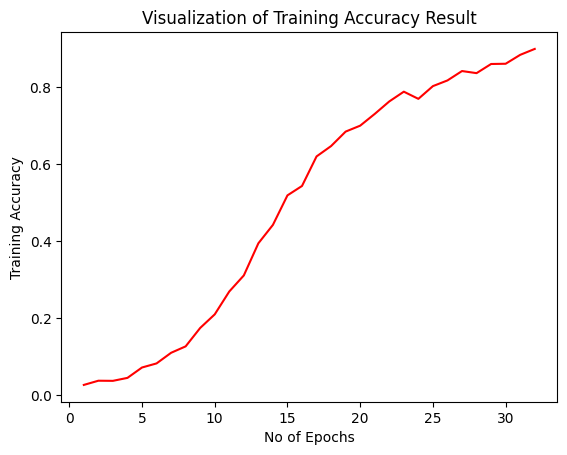

In [130]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

In [131]:
#epochs

Validation Accuracy

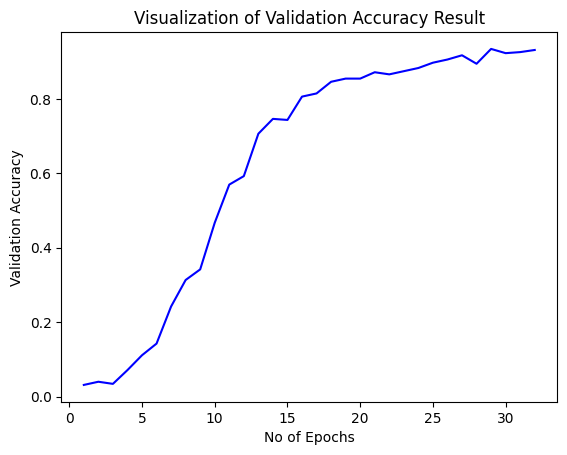

In [132]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test Set Evaluation

In [133]:
test_set = tf.keras.utils.image_dataset_from_directory(
	'/Users/pranshmaurya/Desktop/AIML_Project/archive/test',
	labels = 'inferred',
	label_mode = 'categorical',
	class_names = None,
	color_mode = 'rgb',
	batch_size = 32,
	image_size = (64, 64),
 	shuffle = True,
  seed = None,
  validation_split = None,
  subset = None,
  interpolation = 'bilinear',
  follow_links = False,
  crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [134]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

 5/12 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.9306 - loss: 0.3416

2024-04-30 14:12:31.155749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/12 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.9271 - loss: 0.3645

2024-04-30 14:12:31.498668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.9267 - loss: 0.4289
Test accuracy: 0.9331476092338562
